In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('D:/UE_College_study/Sem2/DataVisulalisation/Final project/sleep_health_lifestyle_dataset.csv')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [16]:
df.shape

(400, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [20]:
print("Summary Statistics:")
df.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Person ID,400.0,200.50000,115.614301,1.0,100.75,200.5,300.250,400.0
Age,400.0,39.95000,14.038883,18.0,29.00,40.0,49.000,90.0
Sleep Duration (hours),400.0,8.04125,2.390787,4.1,5.90,8.2,10.125,12.0
Quality of Sleep (scale: 1-10),400.0,6.12575,1.975733,1.0,4.70,6.1,7.425,10.0
Physical Activity Level (minutes/day),400.0,64.98500,32.297874,10.0,35.00,65.5,94.000,120.0
Stress Level (scale: 1-10),400.0,5.47250,2.808730,1.0,3.00,5.0,8.000,10.0
Heart Rate (bpm),400.0,75.99000,15.099334,50.0,63.00,77.0,90.000,100.0
Daily Steps,400.0,11076.51000,5364.789364,2067.0,6165.25,11785.5,15878.000,19958.0


In [22]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64


In [24]:
df.duplicated().sum()

0

In [26]:
df.columns.to_list()

['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration (hours)',
 'Quality of Sleep (scale: 1-10)',
 'Physical Activity Level (minutes/day)',
 'Stress Level (scale: 1-10)',
 'BMI Category',
 'Blood Pressure (systolic/diastolic)',
 'Heart Rate (bpm)',
 'Daily Steps',
 'Sleep Disorder']

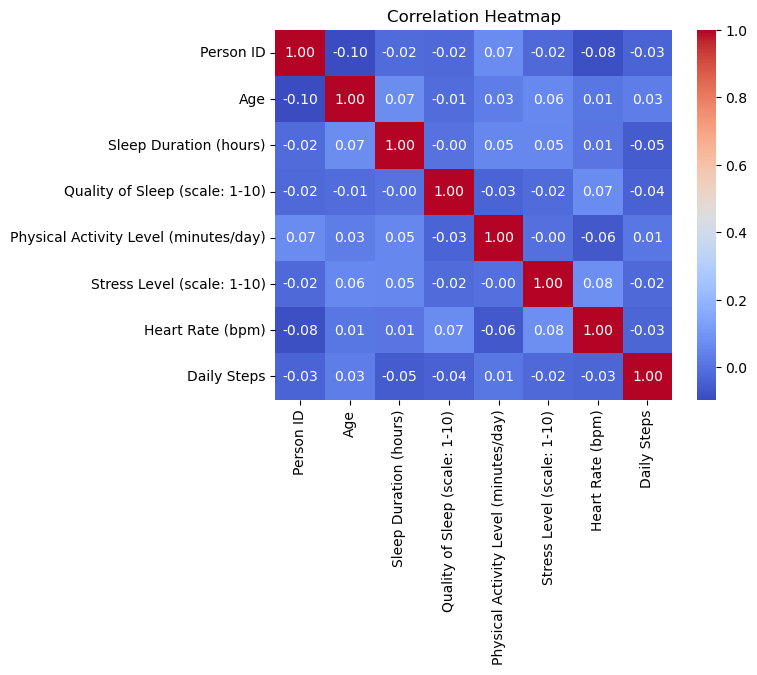

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of Numeric Variables

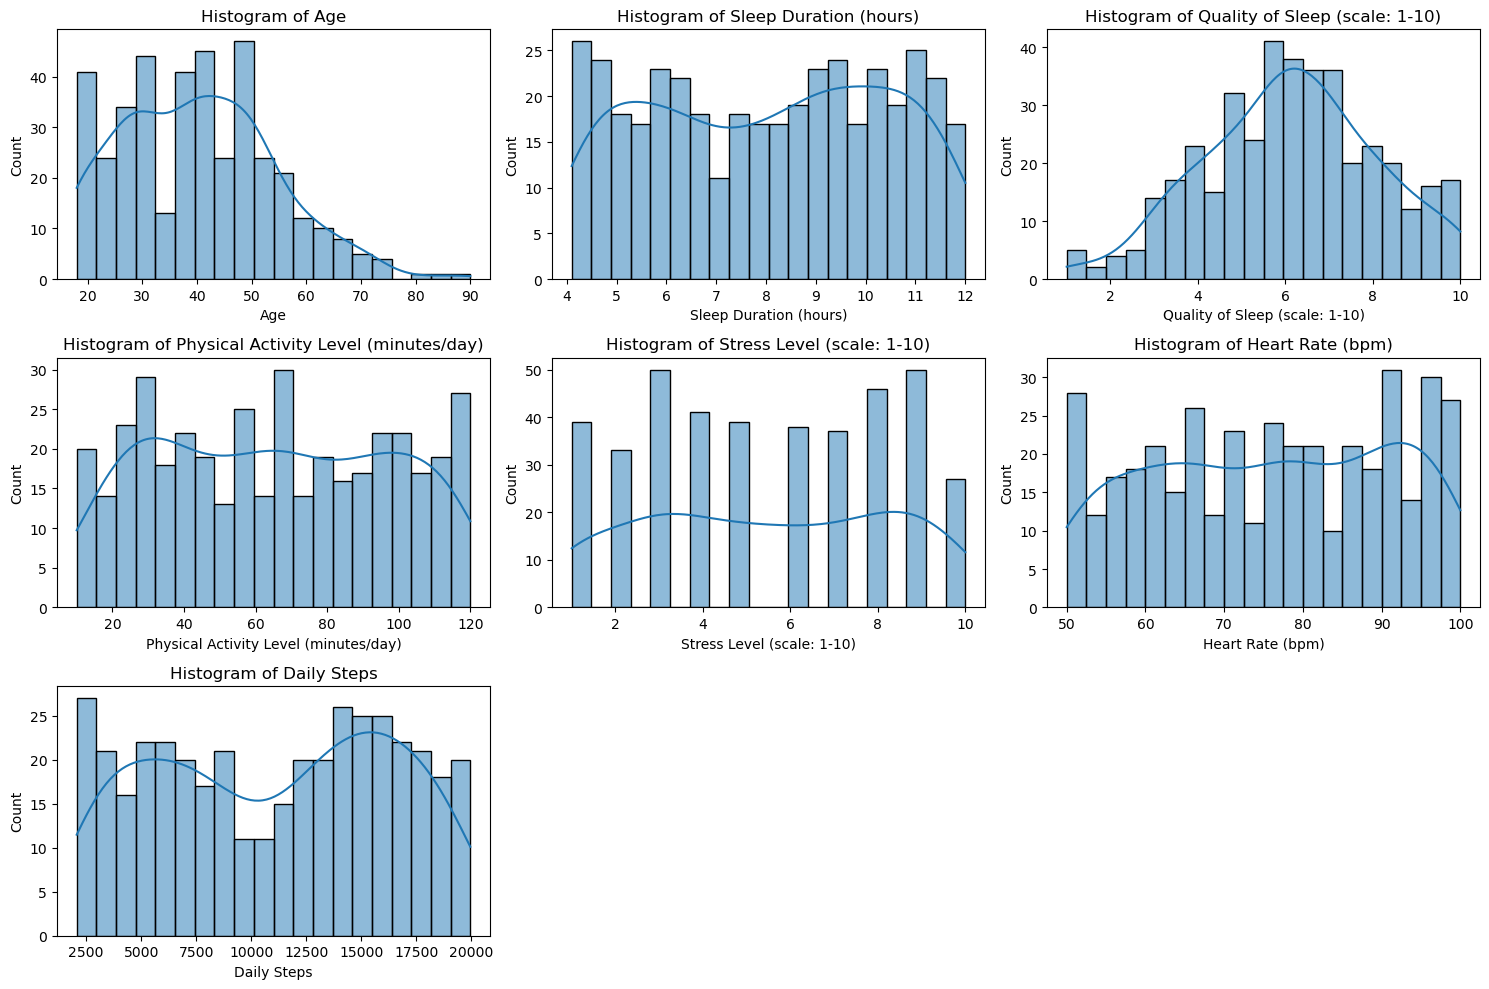

In [31]:
numeric_cols = ['Age', 'Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)', 
                 'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)', 
                 'Heart Rate (bpm)', 'Daily Steps']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# 1. How does sleep duration vary by gender?

Number of Men and Women in a Dataset
Total Men: 199
Total Women: 201


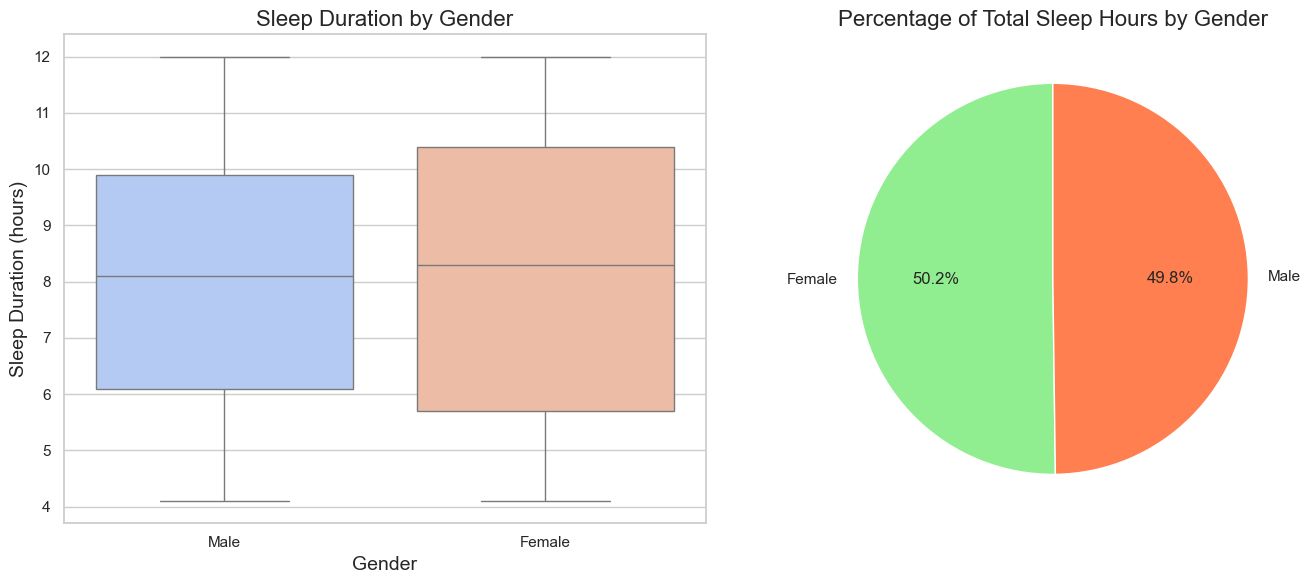

In [62]:
# Calculate total number of Men and Women.
gender_counts = df['Gender'].value_counts()
total_men = gender_counts.get("Male", 0)
total_women = gender_counts.get("Female", 0)

print("Number of Men and Women in a Dataset")
print(f"Total Men: {total_men}")
print(f"Total Women: {total_women}")

# Calculate total sleep hours by gender
total_sleep_by_gender = df.groupby('Gender')['Sleep Duration (hours)'].sum()

# Add a new column for sleep duration as a percentage of total sleep hours for the same gender
df['sleep_percentage'] = df.apply(
    lambda row: (row['Sleep Duration (hours)'] / total_sleep_by_gender[row['Gender']]) * 100,
    axis=1
)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Set the style of the plot
sns.set(style="whitegrid")

# Box plot on the first subplot
sns.boxplot(
    x='Gender',
    y='Sleep Duration (hours)',
    data=df,
    palette='coolwarm',
    ax=axes[0]
)
axes[0].set_title('Sleep Duration by Gender', fontsize=16)
axes[0].set_xlabel('Gender', fontsize=14)
axes[0].set_ylabel('Sleep Duration (hours)', fontsize=14)

# Pie chart on the second subplot
axes[1].pie(
    total_sleep_by_gender,
    labels=total_sleep_by_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'coral']
)
axes[1].set_title('Percentage of Total Sleep Hours by Gender', fontsize=16)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

**Note : Plots clearly shows Female's have more sleep duration over Male.**

# 2. What is the relationship between sleep quality and stress level across age groups?

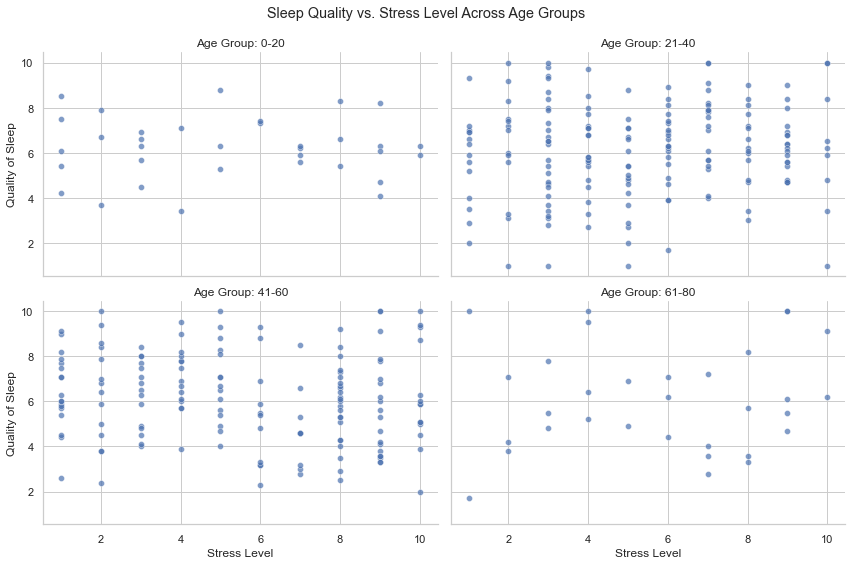

In [28]:
# Create Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])

# Faceted Scatter Plot
g = sns.FacetGrid(df, col="Age Group", col_wrap=2, height=4, aspect=1.5)
g.map(sns.scatterplot, "Stress Level (scale: 1-10)", "Quality of Sleep (scale: 1-10)", alpha=0.7)
g.set_titles("Age Group: {col_name}")
g.set_axis_labels("Stress Level", "Quality of Sleep")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sleep Quality vs. Stress Level Across Age Groups")
plt.show()

**Note :  Plots clearly shows the Age Group 21-40 has more stress level and the Quality of the Sleep is also less for the majority followed by Age Group 41-60 and the Age Group 0-20 has the less stress level. The Age Group 61-80 has the least stress level with good Quality of Sleep among all the Age Groups.**

# 3. How does physical activity level affect the quality of sleep?

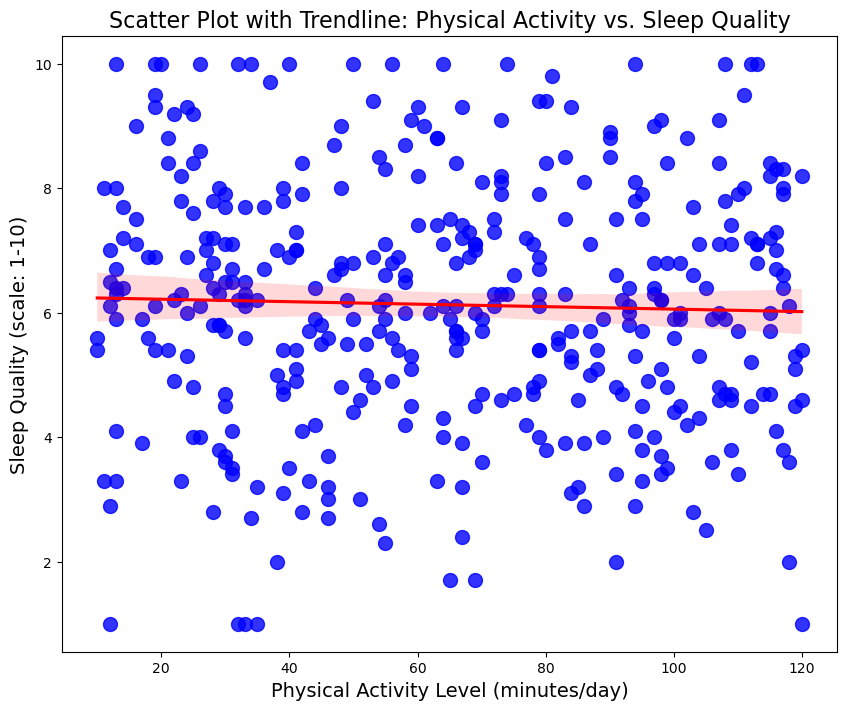

In [33]:
# Scatter plot with trendline using regplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Physical Activity Level (minutes/day)', y='Quality of Sleep (scale: 1-10)', data=df, scatter_kws={'s': 100, 'color': 'blue'}, line_kws={'color': 'red'})

# Add labels and title
plt.title('Scatter Plot with Trendline: Physical Activity vs. Sleep Quality', fontsize=16)
plt.xlabel('Physical Activity Level (minutes/day)', fontsize=14)
plt.ylabel('Sleep Quality (scale: 1-10)', fontsize=14)

# Show the plot
plt.show()

**Note : The plot clearly shows that there is no relationship between Physical Activity and Sleep Quality.**

# 4. What is the distribution of stress levels across different BMI categories?

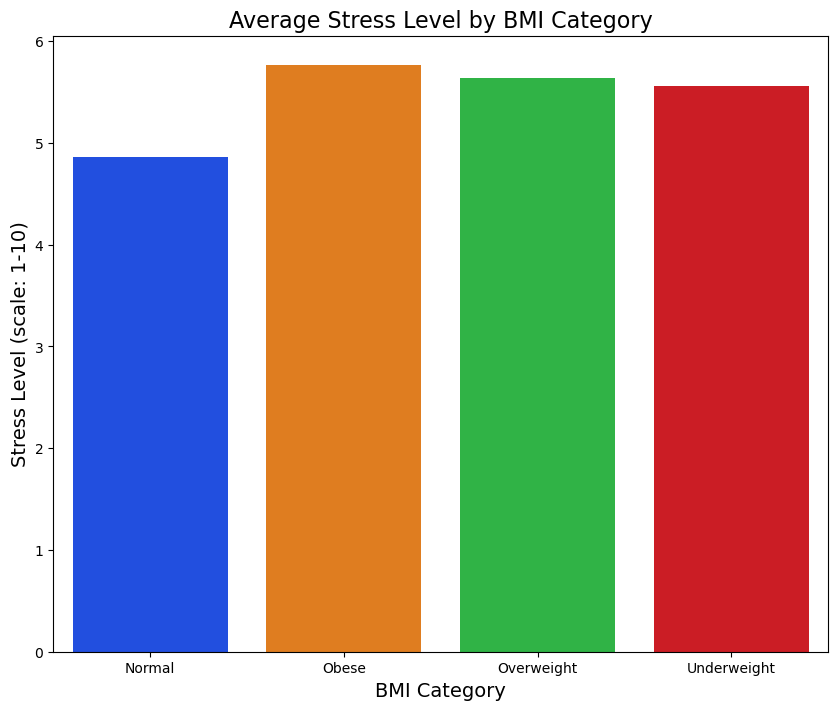

In [37]:
# Group data by BMI Category and calculate mean stress level
grouped_data = df.groupby('BMI Category')['Stress Level (scale: 1-10)'].mean().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='BMI Category', y='Stress Level (scale: 1-10)', data=grouped_data, palette='bright')

# Add labels and title
plt.title('Average Stress Level by BMI Category', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Stress Level (scale: 1-10)', fontsize=14)

# Show the plot
plt.show()

**Note : The plot shows that the stress level for the Normal BMI category is less compared top other BMI category. Obese BMI category has the high stress level.**

# 5. How does the presence of a sleep disorder impact blood pressure (MAP) and pulse pressure (PP) across different age groups?

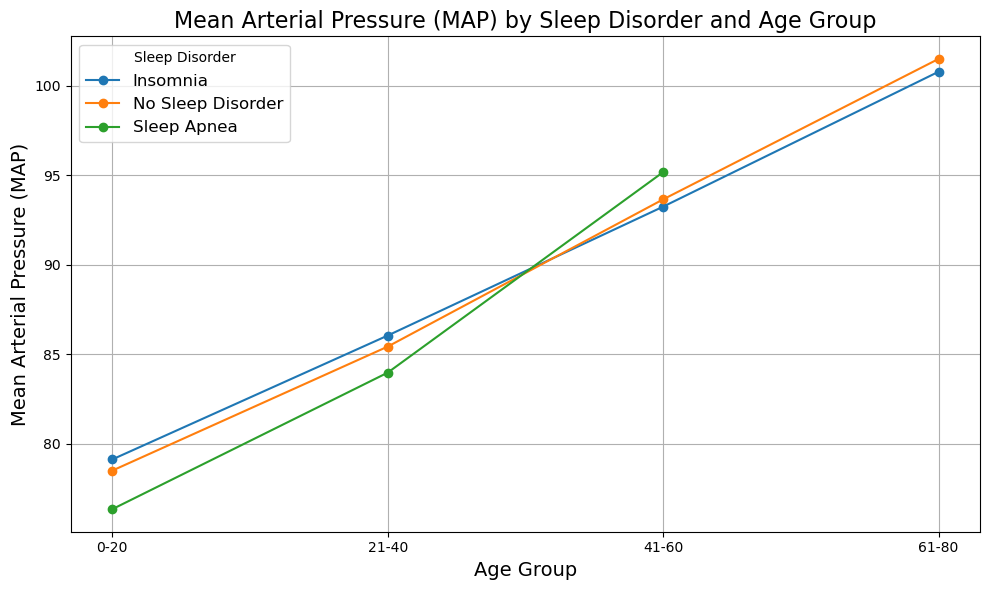

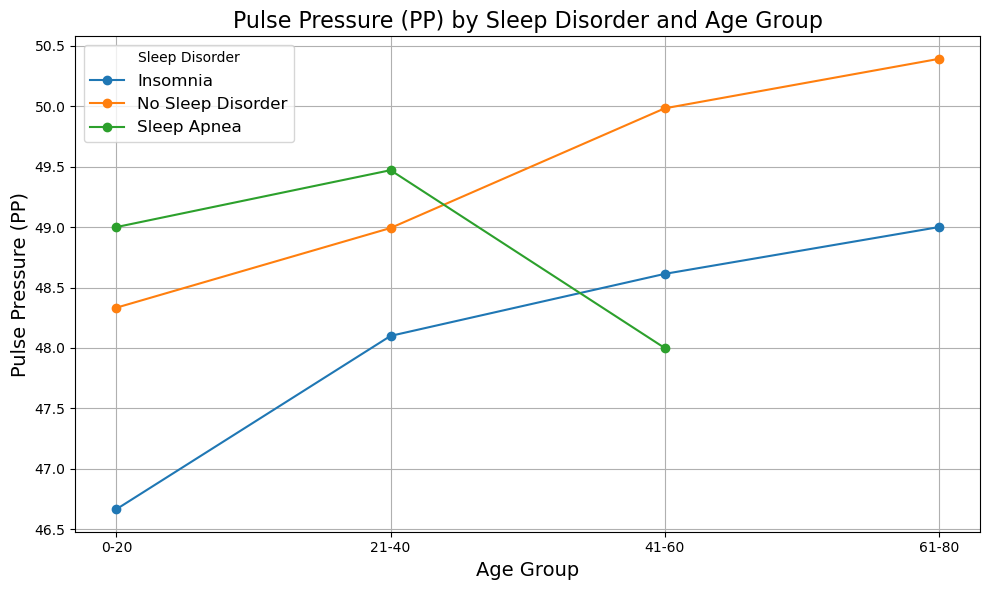

In [42]:
# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure (systolic/diastolic)'].str.split('/', expand=True)

# Convert Systolic and Diastolic columns to integers
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

# Calculate Mean Arterial Pressure (MAP)
df['MAP'] = df['Diastolic'] + (1/3) * (df['Systolic'] - df['Diastolic'])

#to round off to 2 decimal places
df['MAP'] = df['MAP'].round(2)

# Calculate Pulse Pressure (PP)
df['PP'] = df['Systolic'] - df['Diastolic']

df['Sleep Disorder'] = df['Sleep Disorder'].replace([None, pd.NA], "No Sleep Disorder")

# Create Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])

# Group data by Sleep Disorder and Age Group, and calculate the average MAP
average_map = df.groupby(['Age Group', 'Sleep Disorder'])['MAP'].mean().unstack()

# Plot the line graph
plt.figure(figsize=(10, 6))

# Plot each sleep disorder as a separate line
for disorder in average_map.columns:
    plt.plot(average_map.index, average_map[disorder], marker='o', label=disorder)

# Add labels, title, and legend
plt.title('Mean Arterial Pressure (MAP) by Sleep Disorder and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Mean Arterial Pressure (MAP)', fontsize=14)
plt.legend(title="Sleep Disorder", fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Group data by Sleep Disorder and Age Group, and calculate the average MAP
average_map = df.groupby(['Age Group', 'Sleep Disorder'])['PP'].mean().unstack()

# Plot the line graph
plt.figure(figsize=(10, 6))

# Plot each sleep disorder as a separate line
for disorder in average_map.columns:
    plt.plot(average_map.index, average_map[disorder], marker='o', label=disorder)

# Add labels, title, and legend
plt.title('Pulse Pressure (PP) by Sleep Disorder and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Pulse Pressure (PP)', fontsize=14)
plt.legend(title="Sleep Disorder", fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Note: The plot clearly shows that there is no relation between the blood pressure and sleep disorder. However it clearly shows that with the increase in age, the mean arterial pressure (MAP) increases. Also, the plot clearly shows that there is no sleep apnea for the age group above 60.**

# 6. Is there a correlation between daily steps and heart rate?

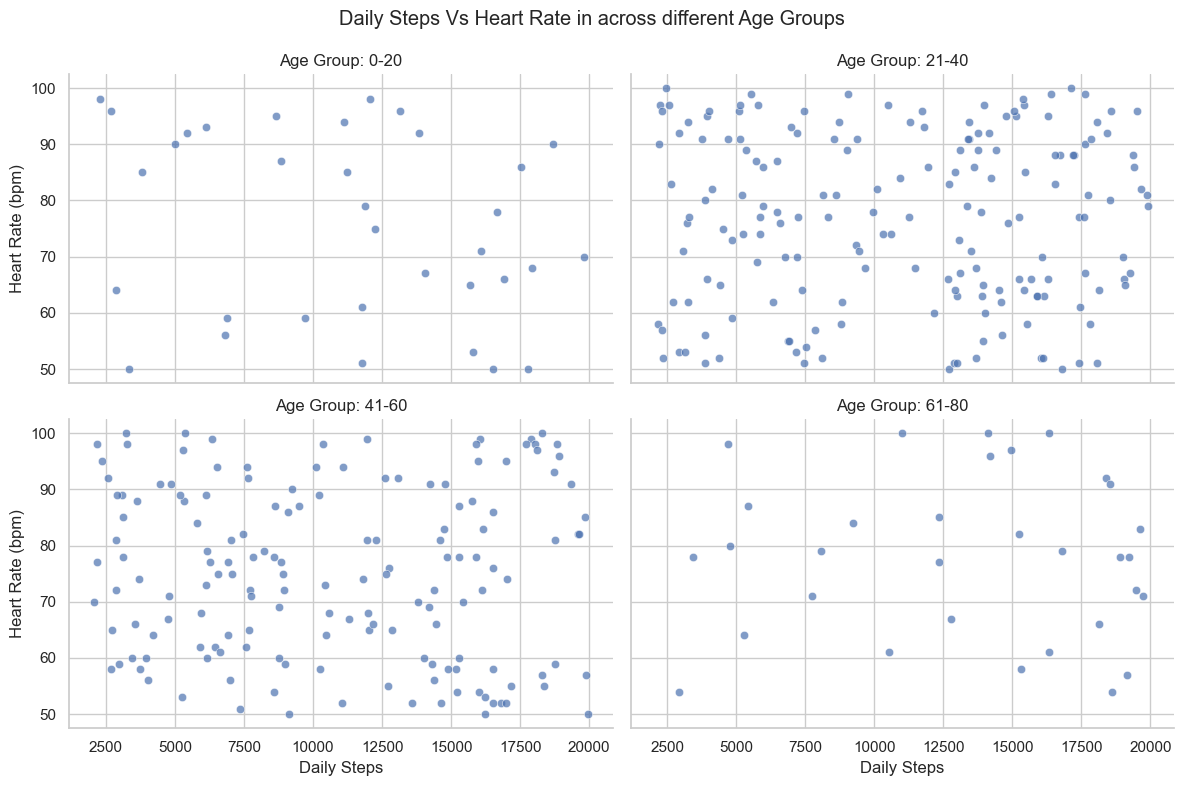

In [116]:
# Create Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])

# Faceted Scatter Plot
g = sns.FacetGrid(df, col="Age Group", col_wrap=2, height=4, aspect=1.5)
g.map(sns.scatterplot, "Daily Steps", "Heart Rate (bpm)", alpha=0.7)
g.set_titles("Age Group: {col_name}")
g.set_axis_labels("Daily Steps", "Heart Rate (bpm)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Daily Steps Vs Heart Rate in across different Age Groups")
plt.show()

**Note: The plot clearly shows that there is no correaltion with the Daily steps and Heart Rate. However, the Daily Steps for the Age Groups 21-40 and 41-60 is high compair to Age Groups 0-20 and 61-80.**

# 7. How does occupation influence sleep quality and sleep duration?

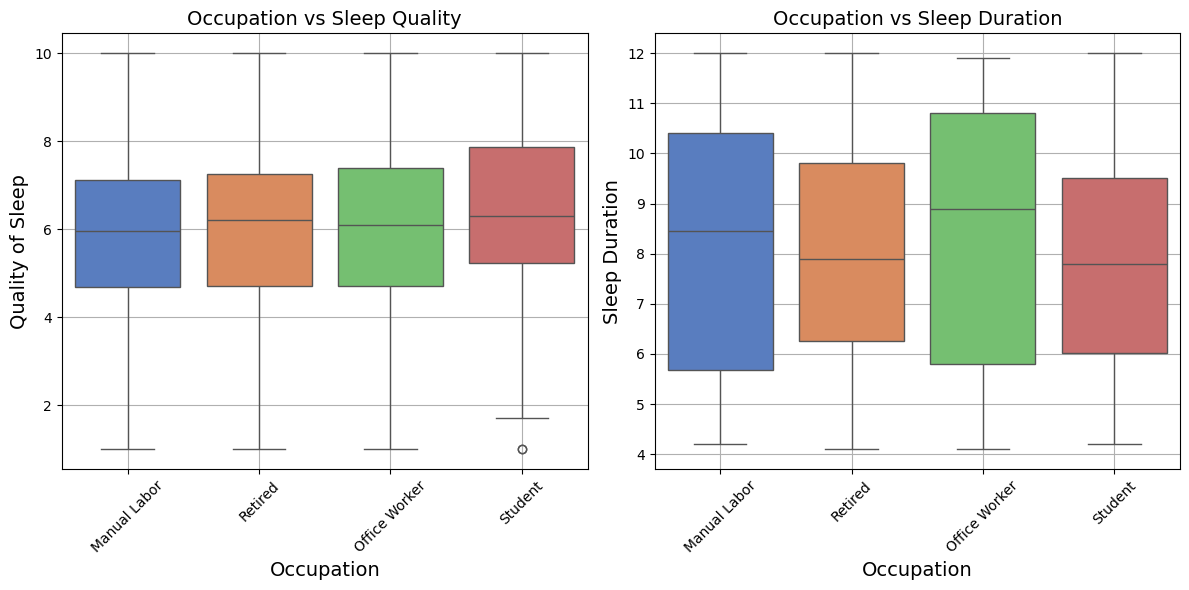

In [52]:
# Create Subplots
plt.figure(figsize=(12, 6))

# First Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x='Occupation', y='Quality of Sleep (scale: 1-10)',palette='muted', data=df)
plt.title('Occupation vs Sleep Quality', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Quality of Sleep', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Second Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='Occupation', y='Sleep Duration (hours)',palette='muted', data=df)
plt.title('Occupation vs Sleep Duration', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Sleep Duration', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**Note: The plot clearly shows, the Student has high Quality of Sleep and Manual Labor has the low Quality of Sleep, but on the contrast the Sleep Duration for the Student is low and the Manual Labour has the high Sleep Duration.**

# 8. What is the distribution of stress levels for individuals with different sleep disorders?

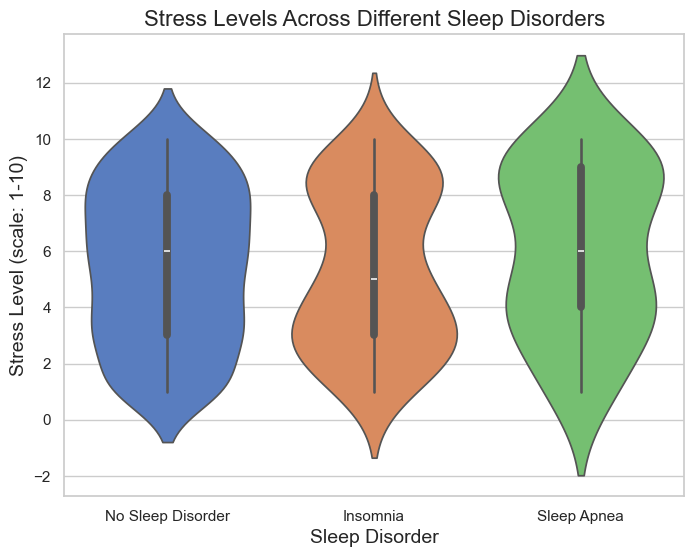

In [160]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sleep Disorder', y='Stress Level (scale: 1-10)', data=df, palette='muted', inner='box')

# Add labels and title
plt.title('Stress Levels Across Different Sleep Disorders', fontsize=16)
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Stress Level (scale: 1-10)', fontsize=14)

# Show the plot
plt.show()

**Note: From the plot the Stress Level for the Sleep Apnea is high and with No Sleep Disorder has less stress level.**

# 9. What is the relationship between age and the likelihood of having a sleep disorder?

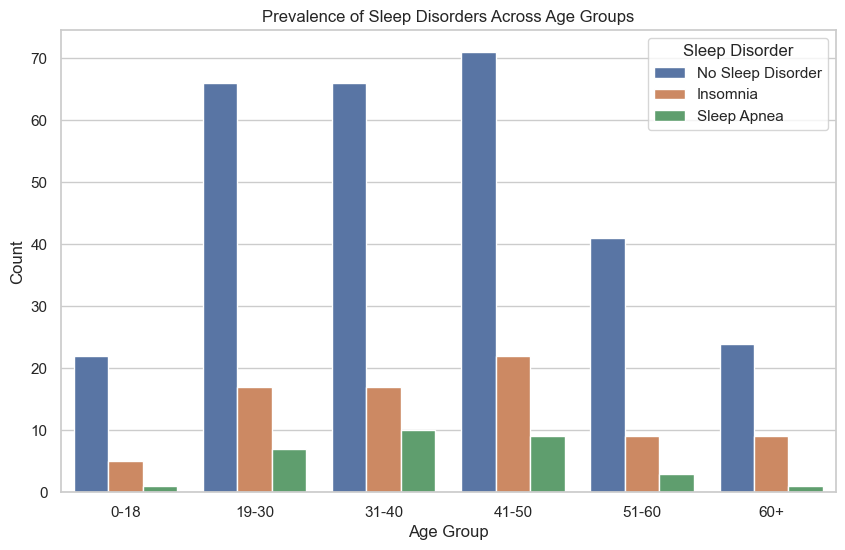

In [163]:
age_bins = pd.cut(df['Age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])
df['Age Group'] = age_bins
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Sleep Disorder', data=df)
plt.title('Prevalence of Sleep Disorders Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Note: The plot clearly shows the Sleep Apnea for the Age Group 0-18 and 60+ is negligibly low and the Age Group 41-50 has the highest count of Insomnia and No Sleep Disorder.**

# 10. How does physical activity level differ among individuals in various BMI categories?

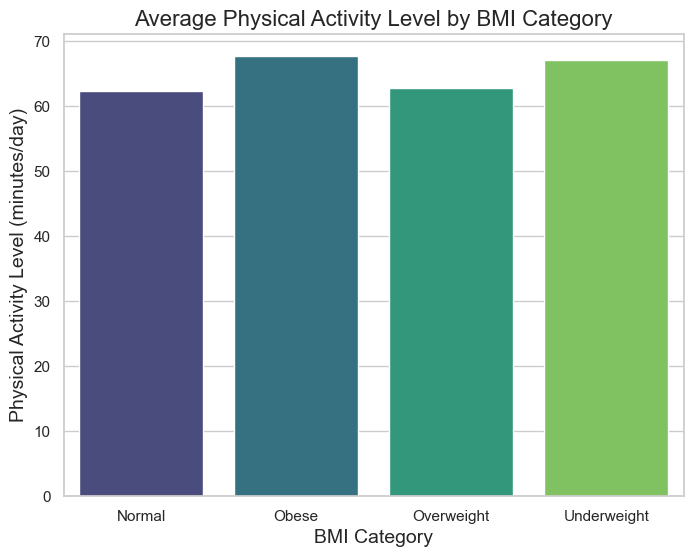

In [166]:
# Group data by BMI Category and calculate mean physical activity level
grouped_data = df.groupby('BMI Category')['Physical Activity Level (minutes/day)'].mean().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='BMI Category', y='Physical Activity Level (minutes/day)', data=grouped_data, palette='viridis')

# Add labels and title
plt.title('Average Physical Activity Level by BMI Category', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Physical Activity Level (minutes/day)', fontsize=14)

# Show the plot
plt.show()

**Note: The Obsese BMI category has high level of Physical Activity and the Normal BMI category has comparatively low level of Physical Activity.** 

# 11. Is there a trend between stress levels and heart rate?

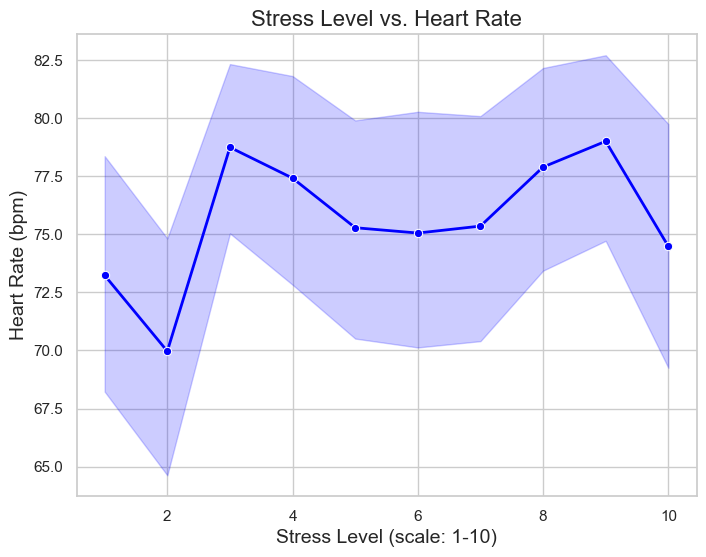

In [181]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='Stress Level (scale: 1-10)', 
    y='Heart Rate (bpm)', 
    data=df, 
    color='blue', 
    marker='o',  # Add markers at each data point
    linewidth=2   # Line width
)

# Add labels and title
plt.title('Stress Level vs. Heart Rate', fontsize=16)
plt.xlabel('Stress Level (scale: 1-10)', fontsize=14)
plt.ylabel('Heart Rate (bpm)', fontsize=14)

# Show the plot
plt.show()


**Note: The line graph clearly shows that there is a relation between Stress level and Heart Rate, as the Stress level increases Heart rate also increases.**

# 12. Which BMI category has more number of Daily Steps?

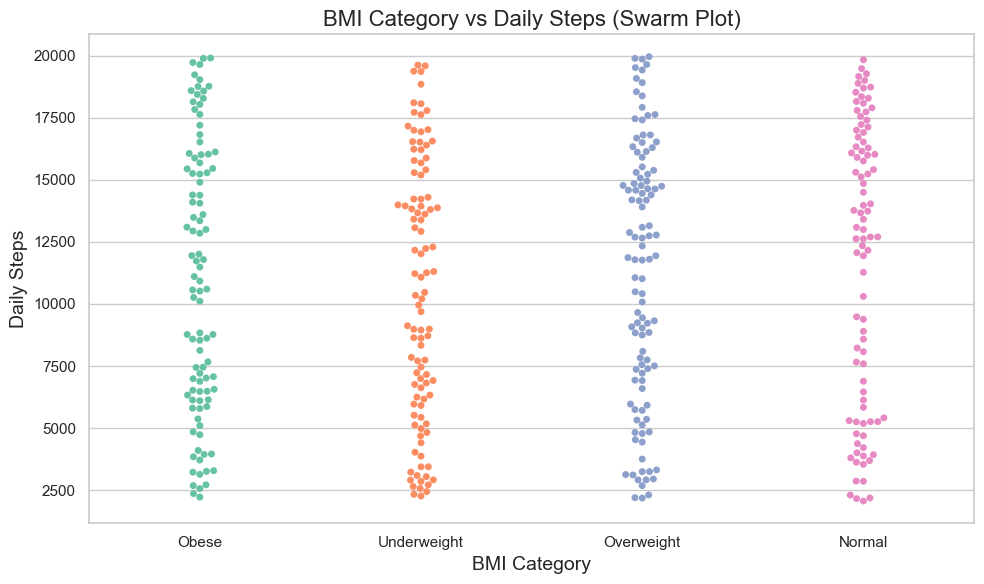

In [65]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='BMI Category', y='Daily Steps', data=df, palette='Set2')

# Add labels and title
plt.title('BMI Category vs Daily Steps (Swarm Plot)', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Daily Steps', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


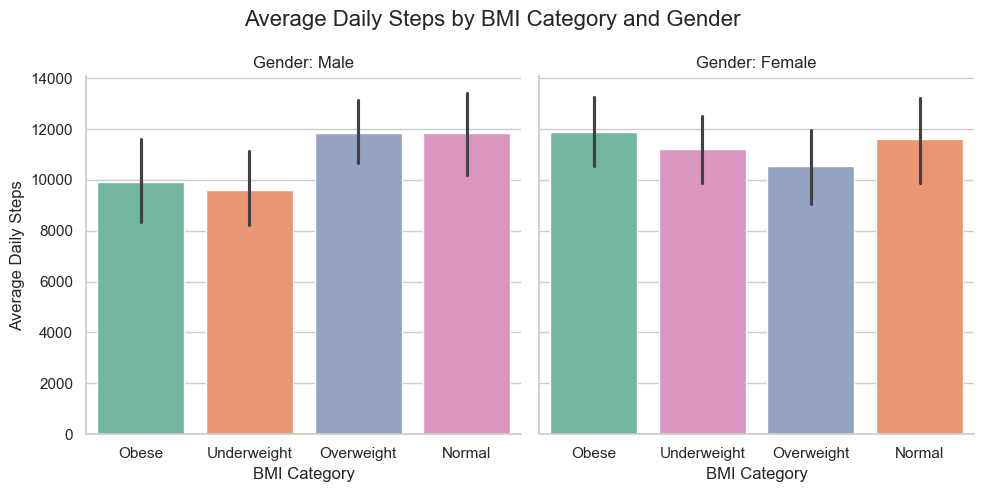

In [67]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a FacetGrid to break down by gender (or any other category)
g = sns.FacetGrid(df, col="Gender", col_wrap=2, height=5)
g.map(sns.barplot, "BMI Category", "Daily Steps", palette='Set2')

# Add labels and title
g.set_titles("Gender: {col_name}")
g.set_axis_labels("BMI Category", "Average Daily Steps")
g.fig.suptitle('Average Daily Steps by BMI Category and Gender', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

**Note: Swarm plot clearly shows that the Obese and Overweight BMI category has more Daily Steps compared to other BMI Category.
Bar plot clearly shows that in Gender category Female's with Obese BMI category has more Daily steps compared to Male's, and male's with Overweight BMI category has more Daily Steps.**